In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt, cm as cmap

In [2]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


In [44]:
### Config

WINGSPAN        = 1400          * 1e-3  # mm
WING_AREA       = 0.36          * 1e0   # m**2
MEAN_CHORD      = WING_AREA/WINGSPAN

In [45]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008_analysis_3_smooth.npy",allow_pickle=True)

In [46]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [47]:
velocity

array([ 1.70419048,  2.27225397,  2.84031746,  3.40838095,  3.97644444,
        4.54450794,  5.11257143,  5.68063492,  6.53273016,  7.3848254 ,
        8.23692063,  9.08901587, 10.22514286, 11.36126984, 14.2015873 ,
       17.04190476, 22.72253968, 28.4031746 , 42.6047619 , 56.80634921])

In [48]:
CL = cl * 1
CD = cd * 1
CM = cm * 1

In [49]:
l = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CL / 2
d = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CD / 2
m = AIR_DENSITY * velocity**2 * MEAN_CHORD**2   * WINGSPAN * CM / 2

In [50]:
l[np.nanargmin(np.abs(alpha-1)),np.nanargmin(np.abs(velocity-10))]/9.8

2.9123155117883757

In [8]:
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}

In [9]:
current_cm = colormap['None']

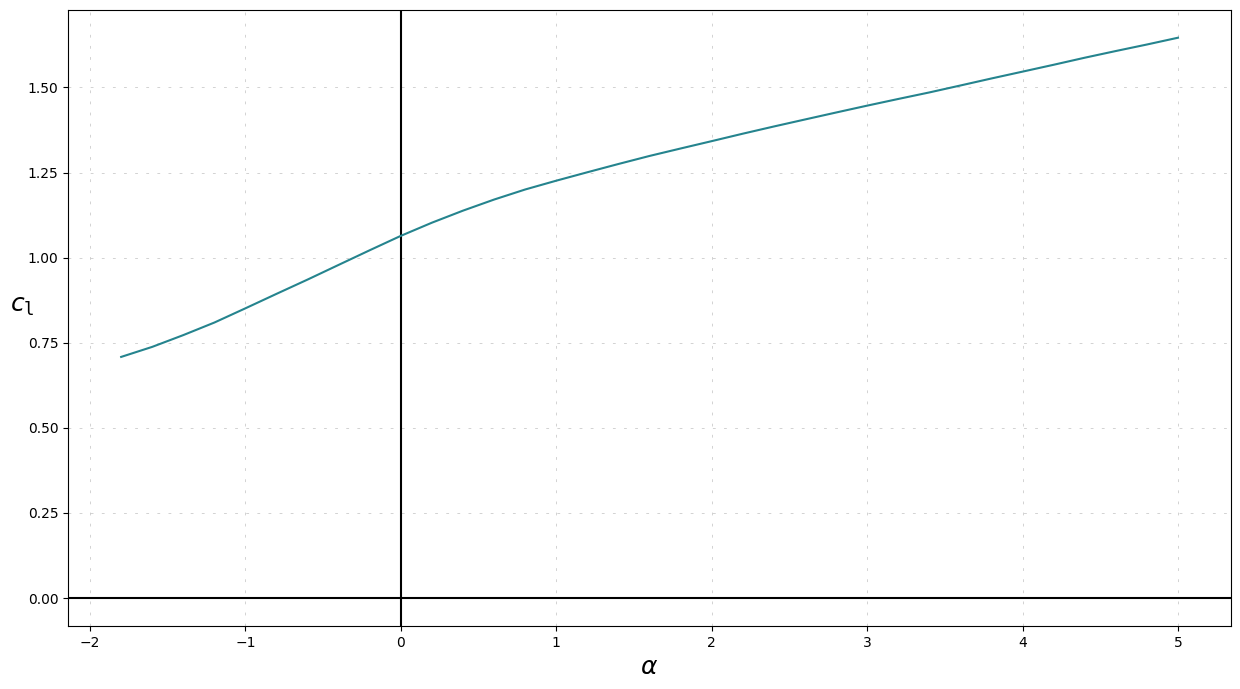

In [20]:
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
# ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
# ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
for i,rey in enumerate(reynolds):
    if i != 10: continue
    # ax.plot(alpha,l[:,i],color=cmap.viridis_r((i+1)/(len(reynolds))))
    ax.plot(alpha[100:-100],cl[100:-100,i],color=cmap.viridis_r((i+1)/(len(reynolds))))